# **PROJETO SALÁRIOS ANALISTA DE DADOS BRASIL**


* **Problema**: o salário de um Analista de Dados não é normalmente divulgado nas vagas, salvo para níveis superiores, como o sênior. Isso dificulta aos profissionais com o nível menor (e.g., os júniores) a estimar uma pretensão salarial mais realista tanto para o contratante como para o contratado, já que o salário pode mudar depenendo da região, do estado, da empresa, etc. Esse projeto traz uma estimativa com bases nessas informações, extraída do site Glassdoor.
* **Objetivo**: estimar os salários de Analistas de Dados, por região, estado e nível de senioridade.
* **Processamento**: Web Scraping & Data Wrangling com Python
* **Deploy**: Dashboard interativo com KPIs e EDA.
---

* *Ferramentas*: 
    * Requests
    * Beautiful Soup
    * Numpy
    * Pandas (com foco em operações vetorizadas)
    * Estatítstica Descritiva
    * Google Data Studio

* *Limitações*: 
    * Foram utilizadas as primeiras páginas de cada url do site Glassdoor
    * Para campos com a informação de salário do tipo "**cerca de x-y**", foi calculada a média entre estes dois valores.

## **1. Bibliotecas**

In [26]:
# Web Crawling:
import requests

# Web Scrapping:
from bs4 import BeautifulSoup

# Expressões regulares:
import re

# Manipulação de dados:
import numpy as np  # arrays
import pandas as pd  # dataframes

## **2. URLs**

* Scrapping da lista de capitais, estados e regiões
* Scrapping das páginas do glassdoor para as capitais

> **Capitais, estados, regiões do Brasil**

In [27]:
url_capitais_br = 'https://pt.wiktionary.org/wiki/Ap%C3%AAndice:Gent%C3%ADlicos_e_top%C3%B3nimos_em_portugu%C3%AAs/Brasil'

> **Dados do Glassdor**

In [28]:
# Acre: Rio Branco
url_AC = 'https://www.glassdoor.com.br/Sal%C3%A1rios/rio-branco-analista-de-dados-sal%C3%A1rio-SRCH_IL.0,10_IC2449799_KO11,28.htm'
# Alagoas: Maceió
url_AL = 'https://www.glassdoor.com.br/Sal%C3%A1rios/macei%C3%B3-analista-de-dados-sal%C3%A1rio-SRCH_IL.0,6_IC2443621_KO7,24.htm'
# Amapá: Macapá
url_AP = 'https://www.glassdoor.com.br/Sal%C3%A1rios/macap%C3%A1-analista-de-dados-sal%C3%A1rio-SRCH_IL.0,6_IC2429591_KO7,24.htm'
# Amazonas: Manaus
url_AM = 'https://www.glassdoor.com.br/Sal%C3%A1rios/manaus-analista-de-dados-sal%C3%A1rio-SRCH_IL.0,6_IM3051_KO7,24.htm'
# Bahia: Salvador
url_BA = 'https://www.glassdoor.com.br/Salaries/salvador-analista-de-dados-pleno-salary-SRCH_IL.0,8_IC2371031_KO9,32.htm'
# Ceará: Fortaleza
url_CE = 'https://www.glassdoor.com.br/Sal%C3%A1rios/fortaleza-analista-de-dados-sal%C3%A1rio-SRCH_IL.0,9_IM3050_KO10,27.htm'
 # DF: Brasília
url_DF = 'https://www.glassdoor.com.br/Sal%C3%A1rios/bras%C3%ADlia-analista-de-dados-sal%C3%A1rio-SRCH_IL.0,8_IM1010_KO9,26.htm'
# Espírito Santo: Vitória
url_ES = 'https://www.glassdoor.com.br/Sal%C3%A1rios/vit%C3%B3ria-analista-de-dados-sal%C3%A1rio-SRCH_IL.0,7_IC2457828_KO8,25.htm'
# Goiás: Goiânia
url_GO = 'https://www.glassdoor.com.br/Sal%C3%A1rios/goi%C3%A2nia-analista-de-dados-sal%C3%A1rio-SRCH_IL.0,7_IC2398468_KO8,25.htm'
 # Maranhão: São Luiz
url_MA = 'https://www.glassdoor.com.br/Sal%C3%A1rios/s%C3%A3o-lu%C3%ADs-analista-de-dados-sal%C3%A1rio-SRCH_IL.0,8_IC2436161_KO9,26.htm'
# Mato Grosso: Cuiabá
url_MT = 'https://www.glassdoor.com.br/Sal%C3%A1rios/cuiab%C3%A1-analista-de-dados-sal%C3%A1rio-SRCH_IL.0,6_IC2467272_KO7,24.htm'
# Mato Grosso do Sul:	Campo Grande
url_MS = 'https://www.glassdoor.com.br/Sal%C3%A1rios/campo-grande-analista-de-dados-sal%C3%A1rio-SRCH_IL.0,12_IC2495037_KO13,30.htm'
# Minas Gerais: Belo Horizonte
url_MG = 'https://www.glassdoor.com.br/Sal%C3%A1rios/belo-horizonte-analista-de-dados-sal%C3%A1rio-SRCH_IL.0,14_IC2514646_KO15,32.htm'
# Pará: Belém
url_PA = 'https://www.glassdoor.com.br/Sal%C3%A1rios/bel%C3%A9m-analista-de-dados-sal%C3%A1rio-SRCH_IL.0,5_IM3053_KO6,23.htm'
# Paraíba: João Pessoa
url_PB = 'https://www.glassdoor.com.br/Sal%C3%A1rios/jo%C3%A3o-pessoa-analista-de-dados-sal%C3%A1rio-SRCH_IL.0,11_IC2488169_KO12,29.htm'
# Paraná: Curitiba
url_PR = 'https://www.glassdoor.com.br/Sal%C3%A1rios/curitiba-analista-de-dados-sal%C3%A1rio-SRCH_IL.0,8_IM1274_KO9,26.htm'
# Pernambuco: Recife
url_PE = 'https://www.glassdoor.com.br/Sal%C3%A1rios/recife-analista-de-dados-sal%C3%A1rio-SRCH_IL.0,6_IM3052_KO7,24.htm'
# Piauí: Teresina
url_PI = 'https://www.glassdoor.com.br/Sal%C3%A1rios/teresina-analista-de-dados-sal%C3%A1rio-SRCH_IL.0,8_IC2446628_KO9,26.htm'
# Rio de Janeiro: Rio de Janeiro
url_RJ = 'https://www.glassdoor.com.br/Sal%C3%A1rios/rio-de-janeiro-analista-de-dados-sal%C3%A1rio-SRCH_IL.0,14_IS3931_KO15,32.htm'
# Rio Grande do Norte: Natal
url_RN = 'https://www.glassdoor.com.br/Sal%C3%A1rios/natal-analista-de-dados-sal%C3%A1rio-SRCH_IL.0,5_IC2396825_KO6,23.htm'
# Rio Grande do Sul: Porto Alegre
url_RS = 'https://www.glassdoor.com.br/Sal%C3%A1rios/porto-alegre-analista-de-dados-sal%C3%A1rio-SRCH_IL.0,12_IC2417359_KO13,30.htm'
# Rondônia:	Porto Velho
url_RO = 'https://www.glassdoor.com.br/Sal%C3%A1rios/porto-velho-analista-de-dados-sal%C3%A1rio-SRCH_IL.0,11_IC2421750_KO12,29.htm'
#Roraima	Boa Vista
url_RR = 'https://www.glassdoor.com.br/Sal%C3%A1rios/boa-vista-analista-de-dados-sal%C3%A1rio-SRCH_IL.0,9_IC2440605_KO10,27.htm'
# Santa Catarina: Florianópolis
url_SC = 'https://www.glassdoor.com.br/Sal%C3%A1rios/florian%C3%B3polis-analista-de-dados-sal%C3%A1rio-SRCH_IL.0,13_IM1003_KO14,31.htm'
# São Paulo: São Paulo
url_SP = 'https://www.glassdoor.com.br/Sal%C3%A1rios/s%C3%A3o-paulo-analista-de-dados-sal%C3%A1rio-SRCH_IL.0,9_IM1009_KO10,27.htm'
 # Sergipe: Aracaju
url_SE = 'https://www.glassdoor.com.br/Sal%C3%A1rios/aracaju-analista-de-dados-sal%C3%A1rio-SRCH_IL.0,7_IC2476814_KO8,25.htm'
# Tocantis: Palmas
url_TO = 'https://www.glassdoor.com.br/Sal%C3%A1rios/palmas-analista-de-dados-sal%C3%A1rio-SRCH_IL.0,6_IC2500891_KO7,24.htm'

## **3. Web Scrapping dos dados**

>### **3.1. Lista de capitais**

In [29]:
def scrape_brazilian_cities(url_capitais_br: str):
  '''Extrai as capitais do Brasil para cada estado. 
  O dataframe de saída, ainda classifica os estados e capitais 
  por região.
  '''
  # conteúdo da página (bruto):
  resposta = requests.get(url_capitais_br)

  # lendo a tabela html de interesse (neste caso é a 3ª):
  tabela_capitais = pd.read_html(resposta.content, encoding = 'utf-8')[2]
    
  # renomeando as colunas:
  tabela_capitais = tabela_capitais[['Sigla', 'Estado', 'Capital', 'Região']]

  # Adicionando DF:
  DF = pd.DataFrame(
        {'Sigla': ['DF'], 
         'Estado': ['Distrito Federal'], 
         'Capital': ['Brasília'], 
         'Região': ['Centro-Oeste']
    })
  tabela_capitais = pd.concat([tabela_capitais, DF], axis = 0, ignore_index=True)

  # criando uma coluna para o país (pensando na ferramenta de BI):
  tabela_capitais['País'] = 'Brasil'

  return tabela_capitais

In [30]:
tabela_capitais = scrape_brazilian_cities(url_capitais_br)
tabela_capitais

,Sigla,Estado,Capital,Região,País
0,AC,Acre,Rio Branco,Norte,Brasil
1,AL,Alagoas,Maceió,Nordeste,Brasil
2,AP,Amapá,Macapá,Norte,Brasil
3,AM,Amazonas,Manaus,Norte,Brasil
4,BA,Bahia,Salvador,Nordeste,Brasil
5,CE,Ceará,Fortaleza,Nordeste,Brasil
6,ES,Espírito Santo,Vitória,Sudeste,Brasil
7,GO,Goiás,Goiânia,Centro-Oeste,Brasil
8,MA,Maranhão,São Luís,Nordeste,Brasil
9,MT,Mato Grosso,Cuiabá,Centro-Oeste,Brasil


>### **3.2. Web Scrapping glassdoor**

In [31]:
def scrape_glassdoor_pages(url:str, sigla_estado: str):
  '''Faz o scraping das páginas do Glassdoor que contêm os salários
  para os Analistas de Dados nas capitais brasileiras.
  '''
  soup = BeautifulSoup(requests.get(url).content, 'html.parser')

  empresas = []
  niveis = []
  posicoes = []
  classificacoes = []
  salarios = []
  unidade_salarios = []

  # colentado as empresas:
  lista_empresas = soup.find_all('h3', 
      {'data-test' : re.compile('salaries-list-item-.*-employer-name')})

  for i in range(0, len(lista_empresas)):
    empresa = lista_empresas[i].find('a').text
    empresas.append(empresa)

  # coletando as posições:
  lista_posicoes = soup.find_all('div', {'class' : 'col-12 col-lg px-xsm'})

  for i in range(0, len(lista_posicoes)):
    posicao = lista_posicoes[i].contents[0].text.split(':')[0]
    posicoes.append(posicao)

  # coletando os salários:
  lista_salarios = soup.find_all('div',
          {'data-test' : re.compile('salaries-list-item-.*-salary-info')})
  
  for i in range(0, len(lista_salarios)):
    salario = lista_salarios[i].find('h3').text.replace('R$', '').replace('\xa0', '').replace('.', '').replace('mil','000').replace('-','').split(sep=' ')
    
    # tratando salários informados como uma faixa (cerca de x-y):
    if len(salario) > 1:
     salario_lower = float(salario[0])
     salario_upper = float(salario[1])
     salario = (salario_lower + salario_upper) / 2

    else:
     salario = float(salario[0])

    salarios.append(salario)

  # unidades (mensal, anual, por hora) - está dentro da informação de posição:
  for i in range(0, len(lista_posicoes)):
    unidade_salario = lista_posicoes[i].find('span').text.split(sep=':')[-1].strip()
    unidade_salarios.append(unidade_salario)

  # Exportanto os dados:
  scrapped_data =  pd.DataFrame({
        'Sigla': sigla_estado,
        'Empresas': empresas,
        'Posicoes': posicoes,
        'Salarios': salarios,
        'UnidadeSalarios': unidade_salarios
   })
  
  return scrapped_data

In [32]:
AC = scrape_glassdoor_pages(url_AC, 'AC')
AL = scrape_glassdoor_pages(url_AL, 'AL')
AP = scrape_glassdoor_pages(url_AP, 'AP')
AM = scrape_glassdoor_pages(url_AM, 'AM')
BA = scrape_glassdoor_pages(url_BA, 'BA')
CE = scrape_glassdoor_pages(url_CE, 'CE')
DF = scrape_glassdoor_pages(url_DF, 'DF')
ES = scrape_glassdoor_pages(url_ES, 'ES')
GO = scrape_glassdoor_pages(url_GO, 'GO')
MA = scrape_glassdoor_pages(url_MA, 'MA')
MT = scrape_glassdoor_pages(url_MT, 'MT')
MS = scrape_glassdoor_pages(url_MS, 'MS')
MG = scrape_glassdoor_pages(url_MG, 'MG')
PA = scrape_glassdoor_pages(url_PA, 'PA')
PB = scrape_glassdoor_pages(url_PB, 'PB')
PR = scrape_glassdoor_pages(url_PR, 'PR')
PE = scrape_glassdoor_pages(url_PE, 'PE')
PI = scrape_glassdoor_pages(url_PI, 'PI')
RJ = scrape_glassdoor_pages(url_RJ, 'RJ')
RN = scrape_glassdoor_pages(url_RN, 'RN')
RS = scrape_glassdoor_pages(url_RS, 'RS')
RO = scrape_glassdoor_pages(url_RO, 'RO')
RR = scrape_glassdoor_pages(url_RR, 'RR')
SC = scrape_glassdoor_pages(url_SC, 'SC')
SP = scrape_glassdoor_pages(url_SP, 'SP')
SE = scrape_glassdoor_pages(url_SE, 'SE')
TO = scrape_glassdoor_pages(url_TO, 'TO')

>### **3.3. Concatenando Dados do Glassdoor para as capitais**

In [33]:
def concat_states(lista_estados: list):
 '''Concatena os resultados para todas as capitais, gerando um
 um só dataframe de saída

 Input: lista de URLs para cada capital
 Output:  dataframe com os dados resultantes de cada URL
 '''
 dados = pd.concat(
      lista_estados,
      axis = 0, ignore_index=True
 )
  
 return dados

In [34]:
dados_glassdoor = concat_states([
    AC,   AL,   AP,   AM, 
    BA,   CE,   DF,   ES, 
    GO,   MA,   MT,   MS,
    MG,   PR,    PE,   PI,  
    RJ,   RS,   RO,   RR,  
    SC,  SP,   SE,   TO,
     PA, PB, RN
 ])

dados_glassdoor.head()

,Sigla,Empresas,Posicoes,Salarios,UnidadeSalarios
0,AC,americanas s.a.,Analista De Dados,5000.0,mensal
1,AC,Tabelionato de Notas,Analista De Dados,1000.0,prestador de serviços mensal
2,AL,Italac,Analista De Dados,2000.0,mensal
3,AL,"Secretaria de Estado do Planejamento, Gestão e...",Analista De Dados,4000.0,prestador de serviços mensal
4,AL,Ciclic,Analista de dados jr,4000.0,mensal


* Como algumas posições não inforam a senioridade do profissional, pode-se estimar uma faixa de corte com base na média e no desvio padrão com base nos resultados de "**Analista de Dados Pleno em Brasil**", também extraídos do Glassdoor.

In [35]:
URL_analistas_pleno_BR = 'https://www.glassdoor.com.br/Sal%C3%A1rios/analista-de-dados-pleno-sal%C3%A1rio-SRCH_KO0,23.htm'

In [36]:
def calcula_salario_de_corte(url_analista_pleno):
  '''Extrai os dados de salário para Analista de Dados Pleno
  a nível nacional (do Glassdoor) e calcula a média e o desvio padrão.

  Input: url Analista de Dados Pleno em Brasil (Glassdoor)
  Output: media e desvio padrão para salário Analista de Dados Pleno
  '''
  pagina_analistas_pleno_BR = BeautifulSoup(
      requests.get(URL_analistas_pleno_BR).content,
     'html.parser'
  )

  salarios_nivel_pleno_BR = []

  salarios = pagina_analistas_pleno_BR.find_all('div',
       {'data-test' : re.compile('salaries-list-item-.*-salary-info')}
   )

  for i in range(0, len(salarios)):
    salario = float(salarios[i].find('h3').text.replace('R$\xa0', '').replace('.', ''))
    salarios_nivel_pleno_BR.append(salario)

  media = np.mean(salarios_nivel_pleno_BR)
  desvio_padrao = np.std(salarios_nivel_pleno_BR)

  salario_analista_pleno_inferior = round(media - desvio_padrao, 2)
  salario_analista_pleno_superior = round(media + desvio_padrao, 2)

  return salario_analista_pleno_inferior, salario_analista_pleno_superior

In [37]:
salario_corte_pleno = calcula_salario_de_corte(URL_analistas_pleno_BR)

salario_analista_pleno_inferior = salario_corte_pleno[0]
salario_analista_pleno_superior = salario_corte_pleno[1]

print(f'Limite de corte inferior: R$ {salario_analista_pleno_inferior}')
print(f'Limite de corte superior: R$ {salario_analista_pleno_superior}')

Limite de corte inferior: R$ 5293.57
Limite de corte superior: R$ 7876.53


Mesma lógica para "**Analista de Dados Sênior**", mas aqui vamos extrair a média de salário:

In [38]:
URL_analistas_senior_BR = 'https://www.glassdoor.com.br/Sal%C3%A1rios/analista-de-dados-s%C3%AAnior-sal%C3%A1rio-SRCH_KO0,24.htm'

In [39]:
def calcula_salario_medio_senior(url_analista_pleno):
  '''Calcula a média de salário para Analista de Dados Sênior
  a nível nacional (do Glassdoor) 

  Input: url Analista de Dados Sênior em Brasil (Glassdoor)
  Output: media para salário Analista de Dados Sênior
  '''
  pagina_analistas_pleno_BR = BeautifulSoup(
      requests.get(URL_analistas_pleno_BR).content,
     'html.parser'
  )

  salarios_nivel_pleno_BR = []

  salarios = pagina_analistas_pleno_BR.find_all('div',
       {'data-test' : re.compile('salaries-list-item-.*-salary-info')}
   )

  for i in range(0, len(salarios)):
    salario = float(salarios[i].find('h3').text.replace('R$\xa0', '').replace('.', ''))
    salarios_nivel_pleno_BR.append(salario)

  media_salario_analista_senior = np.mean(salarios_nivel_pleno_BR)

  return media_salario_analista_senior

In [40]:
media_salario_analista_senior = calcula_salario_medio_senior(URL_analistas_senior_BR)

>### **3.4. Data Wrangling glassdoor**

In [41]:
def wrangle_data(dados_glassdoor):
  """Esta função recebe aplica os devidos tratamentos ao dataframe com os dados do 
  Glassdoor

  Input: dataframe com os dados extraídos do Glassdoor.
  Output: dados tratados.
  """
  # posiçoes em minúsculo:
  dados_glassdoor['Posicoes'] = dados_glassdoor['Posicoes'].str.lower()
  
  # adicionando uma coluna para "trackear" a unidade de salário:
  dados_glassdoor['UnidadeSalarios'].loc[
      dados_glassdoor['UnidadeSalarios'].str.match(r'(.*mensal.*)') == True
  ] = 'mensal'

  dados_glassdoor['UnidadeSalarios'].loc[
      dados_glassdoor['UnidadeSalarios'].str.match(r'(.*hora.*)') == True
  ] = 'valor-hora'

  dados_glassdoor['UnidadeSalarios'].loc[
      (dados_glassdoor['UnidadeSalarios'].str.match(r'(.*estagiário.*)') == True)
      |
      (dados_glassdoor['UnidadeSalarios'].str.match(r'(.*trainee.*)') == True)
  ] = 'estagiário'

  dados_glassdoor['UnidadeSalarios'].loc[
      (dados_glassdoor['UnidadeSalarios'].str.match(r'(.*mensal.*)') == False)
      &
      (dados_glassdoor['UnidadeSalarios'].str.match(r'(.*valor-hora.*)') == False)
  ] = 'anual'  

  # corrigindo salários anuais (faixa checada em EDA):
  dados_glassdoor.loc[
      dados_glassdoor['UnidadeSalarios'] == 'anual', 'Salarios'
  ] = dados_glassdoor['Salarios'] / 12
  
  # corrigindo valores-hora (assumindo 40 h semanais):
  dados_glassdoor.loc[
      dados_glassdoor['UnidadeSalarios'] == 'valor-hora', 'Salarios'
  ] = dados_glassdoor['Salarios'] * 40 * 4

 # definindo algumas senioridades pela descrição de posição (nem todas vão informar): 
  dados_glassdoor['Nivel'] = dados_glassdoor['Posicoes'].apply(lambda x: x.split(sep=' ')[-1])
  dados_glassdoor['Nivel'] = dados_glassdoor['Nivel'].str.lower()

  # aplicando correções nos níveis:
  dados_glassdoor['Nivel'].loc[
      (dados_glassdoor['Nivel'].str.match(r'(.*jr.*)') == True)
      |
      (dados_glassdoor['Nivel'].str.match(r'(.*Júnior.*)') == True)
      |
      (dados_glassdoor['Nivel'].str.match(r'(.*júnior.*)') == True)
      |
      (dados_glassdoor['Nivel'].str.match(r'(.*j&uacute;nior.*)') == True)
  ] = 'Júnior'

  dados_glassdoor['Nivel'].loc[
      (dados_glassdoor['Nivel'].str.match(r'(.*Pleno.*)') == True)
      |
      (dados_glassdoor['Nivel'].str.match(r'(.*pleno.*)') == True)
  ] = 'Pleno'

  dados_glassdoor['Nivel'].loc[
      (dados_glassdoor['Nivel'].str.match(r'(.*sênior.*)') == True)
      |
      (dados_glassdoor['Nivel'].str.match(r'(.*Sênior.*)') == True)
      |
      (dados_glassdoor['Nivel'].str.match(r'(.*s&ecirc;nior.*)') == True)
  ] = 'Sênior'

  dados_glassdoor['Nivel'].loc[
      (dados_glassdoor['Nivel'].str.match(r'(.*trainee*)') == True)
  ] = 'Estagiário'
  # -- 
  dados_glassdoor['Nivel'] = dados_glassdoor['Nivel'].replace('', 'dados')
  dados_glassdoor['Nivel'] = dados_glassdoor['Nivel'].replace('iv', 'dados')
  # -- 
  dados_glassdoor.loc[dados_glassdoor['Salarios'] <= 1000, 'Nivel'] = 'Estagiário'
  dados_glassdoor.loc[dados_glassdoor['Nivel'] == 'Estagiário'] = None
  dados_glassdoor.loc[(dados_glassdoor['Nivel'] == 'dados') & (dados_glassdoor['Salarios'] < salario_analista_pleno_inferior), 'Nivel'] = 'Júnior'
  dados_glassdoor.dropna(axis=0, inplace=True)
  # -- 
  dados_glassdoor.loc[
      (dados_glassdoor['Nivel'] == 'dados')
      &
      (dados_glassdoor['Salarios'] >= salario_analista_pleno_inferior)
      &
      (dados_glassdoor['Salarios'] <= salario_analista_pleno_superior),
  'Nivel'] = 'Pleno'
  # -- 
  dados_glassdoor.loc[(dados_glassdoor['Nivel'] == 'dados') & (dados_glassdoor['Salarios'] > salario_analista_pleno_superior), 'Nivel'] = 'Sênior'

  # -- tratando eventuais erros quanto ao salário de sênior:
  dados_glassdoor['Salarios'].loc[
      (dados_glassdoor['Posicoes'].str.match(r'(.*analista de dados.*)') == True)
      &
      (dados_glassdoor['Nivel'] == 'Sênior')
      &
      (dados_glassdoor['Salarios'] < salario_analista_pleno_superior)
  ] = media_salario_analista_senior
  
  # corrigindo os cargos (separando em analista de dados e DBAs):
  dados_glassdoor['Posicoes'].loc[
      (dados_glassdoor['Posicoes'].str.match(r'(.*analista de dados.*)') == True)
      |
      (dados_glassdoor['Posicoes'].str.match(r'(.*analista de inteligência de dados.*)') == True)
      |
      (dados_glassdoor['Posicoes'].str.match(r'(.*analista de ciência de dados.*)') == True)   
  ] = 'Analista de dados'

  dados_glassdoor['Posicoes'].loc[
      (dados_glassdoor['Posicoes'].str.match(r'(.*banco de dados.*)') == True)
      |
      (dados_glassdoor['Posicoes'].str.match(r'(.*database.*)') == True)
      |
      (dados_glassdoor['Posicoes'].str.match(r'(.*dba.*)') == True)   
  ] = 'Analista de banco de dados (DBA)'

  dados_glassdoor['Posicoes'].loc[
      (dados_glassdoor['Posicoes'].str.match(r'(.*analista de redes e comunica&ccedil;&atilde;o de dados.*)') == True)
      |
      (dados_glassdoor['Posicoes'].str.match(r'(.*cientista de dados.*)') == True)
      |
      (dados_glassdoor['Posicoes'].str.match(r'(.*engenheiro de dados.*)') == True)
  ] = 'Outros'
  
  dados_glassdoor.drop(dados_glassdoor[dados_glassdoor['Posicoes'] == 'Outros' ].index, inplace=True)

  return dados_glassdoor

> **Observação:**

* Possibilidades da informação de **Salário**:
  * mensal e por hora são informados
  * no caso de não informado, o salário é anual (foi conferido e confirmado este fato em cada situação desta, entrando na página). 

  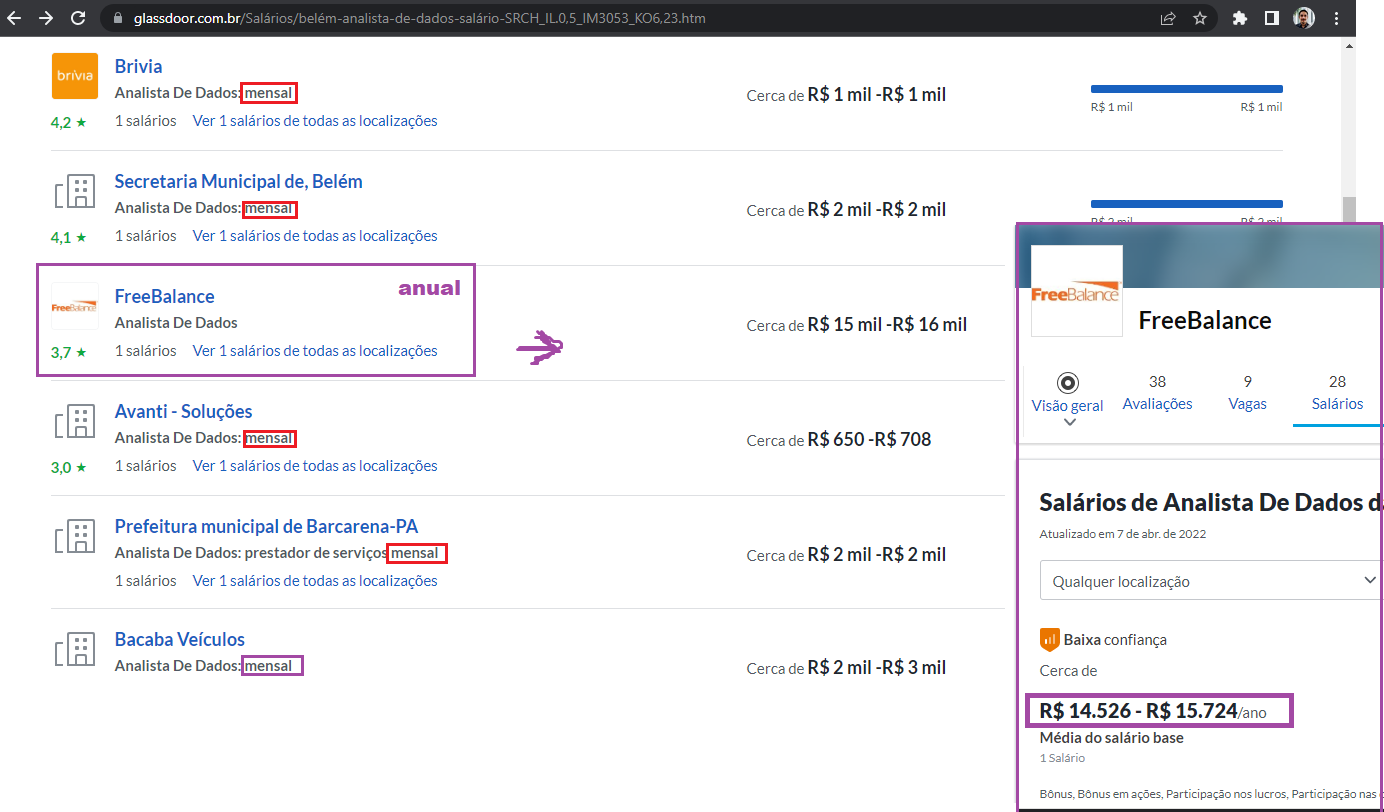

In [42]:
dados_glassdor_limpos = wrangle_data(dados_glassdoor)
dados_glassdor_limpos.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Sigla,Empresas,Posicoes,Salarios,UnidadeSalarios,Nivel
0,AC,americanas s.a.,Analista de dados,5000.0,mensal,Júnior
2,AL,Italac,Analista de dados,2000.0,mensal,Júnior
3,AL,"Secretaria de Estado do Planejamento, Gestão e...",Analista de dados,4000.0,mensal,Júnior
4,AL,Ciclic,Analista de dados,4000.0,mensal,Júnior
5,AL,Magazine Luiza,Analista de banco de dados (DBA),6000.0,mensal,Júnior


In [43]:
 # excluindo a coluna para a unidade de salário:
dados_glassdor_limpos.drop(['UnidadeSalarios'], axis=1, inplace=True)

>### **3.5. Merge do dados do Glassdoor com os dados das Capitais brasileiras**

In [44]:
def merge_daataframes(dados_glassdor_limpos, tabela_capitais):
  '''Realiza o "merge dos dados extraídos do Glassdoor para as capitais, com 
  o dataframe cotendo os estados e regiões do Brasil correspondentes

  Input: dataframe com os dados do Glassdor e dataframe com capitais, estados 
  e regiões.
  Output: dados consolidados em um único dataframe
  '''
  return pd.merge(
      dados_glassdor_limpos,
       tabela_capitais,
       on='Sigla', 
       how = "inner"
)

In [45]:
dados_tratados = merge_daataframes(dados_glassdor_limpos, tabela_capitais)
dados_tratados.head()

,Sigla,Empresas,Posicoes,Salarios,Nivel,Estado,Capital,Região,País
0,AC,americanas s.a.,Analista de dados,5000.0,Júnior,Acre,Rio Branco,Norte,Brasil
1,AL,Italac,Analista de dados,2000.0,Júnior,Alagoas,Maceió,Nordeste,Brasil
2,AL,"Secretaria de Estado do Planejamento, Gestão e...",Analista de dados,4000.0,Júnior,Alagoas,Maceió,Nordeste,Brasil
3,AL,Ciclic,Analista de dados,4000.0,Júnior,Alagoas,Maceió,Nordeste,Brasil
4,AL,Magazine Luiza,Analista de banco de dados (DBA),6000.0,Júnior,Alagoas,Maceió,Nordeste,Brasil


## **4. Coleta dos dados**

In [46]:
colunas_nova_ordem = [
    'País', 'Região', 'Estado', 'Sigla','Capital', 
    'Empresas', 'Posicoes', 'Nivel', 'Salarios'
]

dados_tratados = dados_tratados[colunas_nova_ordem]

dados_tratados.rename(
    columns={
        'Sigla': 'Sigla (Estado)',
        'Empresas': 'Empresa',
        'Posicoes': 'Cargo',
        'Nivel': 'Senioridade',
        'Salarios': 'Salário'
        }, inplace=True
)

In [47]:
dados_tratados

,País,Região,Estado,Sigla (Estado),Capital,Empresa,Cargo,Senioridade,Salário
0,Brasil,Norte,Acre,AC,Rio Branco,americanas s.a.,Analista de dados,Júnior,5000.0
1,Brasil,Nordeste,Alagoas,AL,Maceió,Italac,Analista de dados,Júnior,2000.0
2,Brasil,Nordeste,Alagoas,AL,Maceió,"Secretaria de Estado do Planejamento, Gestão e...",Analista de dados,Júnior,4000.0
3,Brasil,Nordeste,Alagoas,AL,Maceió,Ciclic,Analista de dados,Júnior,4000.0
4,Brasil,Nordeste,Alagoas,AL,Maceió,Magazine Luiza,Analista de banco de dados (DBA),Júnior,6000.0
...,...,...,...,...,...,...,...,...,...
321,Brasil,Nordeste,Rio Grande do Norte,RN,Natal,Activesoft Brasil,Analista de dados,Júnior,3000.0
322,Brasil,Nordeste,Rio Grande do Norte,RN,Natal,BeAnalytic,Analista de dados,Júnior,2000.0
323,Brasil,Nordeste,Rio Grande do Norte,RN,Natal,Oi,Analista de dados,Sênior,8000.0
324,Brasil,Nordeste,Rio Grande do Norte,RN,Natal,Robiel,Analista de dados,Júnior,2000.0


> **Exportanto**

In [50]:
dados_tratados.to_csv('SalariosGlassdoor.csv', index=False, encoding='utf-8')